In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
cd csfit

/home/g.samarth/csfit


In [12]:
from cs_fit import coupmat
cij_synth = coupmat(194, 206, 4)
cij_synth.generate_synth()

hahaha


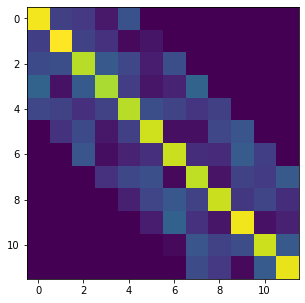

In [14]:
plt.figure(figsize=(5, 5))
plt.imshow(cij_synth.coup_mat)
plt.show()

In [20]:
a = np.identity(20)
a5 = a[:, 5].copy()
a7 = a[:, 7].copy()
a[5, :] = np.random.rand()

In [22]:
if a:
    print(5)
else:
    print(0)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [24]:
?any

Signature: any(iterable, /)
Docstring:
Return True if bool(x) is True for any x in the iterable.

If the iterable is empty, return False.
Type:      builtin_function_or_method
